67.53812766874631 [5.58380683e+06 1.40568900e-06 4.32787239e+06 7.68844435e+02]
-221.28970459056157 -229.79866361065166


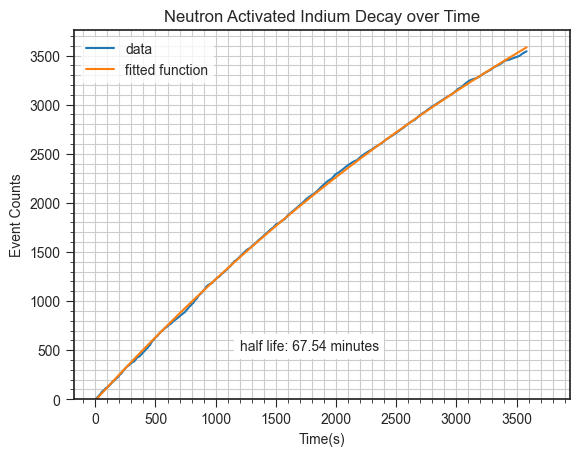

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

"""# initializing time sequence and saving to data
time = np.append(np.arange(26,180,1),np.append(np.arange(180,1600,10),np.arange(1600,3610,30)))-26
np.savetxt('exp_data.csv',time,fmt='%i')"""

data = np.genfromtxt('exp_data.csv',delimiter=',')

time = (data[:,0]-26)
background = (437/1205)*time
counts = data[:,1]-background


def fitfunc(x,a,b,c,d):
    return a*(d-np.exp(-b*(x+c)))

params, cov = curve_fit(fitfunc,time,counts,p0=[6e3,2.3e-4,1,1])
perr = np.sqrt(np.diag(cov))
hlf_life = np.log(2)/(params[1])/60

plt.style.use(plt.style.available[25])
plt.plot(time,counts,label=r'data')
plt.plot(time,fitfunc(time,*params),label=r"fitted function")
plt.title(r'Neutron Activated Indium Decay over Time')
plt.xlabel(r'Time(s)')
plt.ylabel(r'Event Counts')
plt.text(1200,500,r'half life: %.2f minutes' % hlf_life,
         bbox={'facecolor':'white','ec':'none'})
plt.ylim(bottom=0)
plt.xlim(right=1.1*time.max())
plt.minorticks_on()
plt.grid(True,which='both')
lg = plt.legend(frameon=True)
lg.get_frame().set_linewidth(0.0)
plt.savefig('exp8_plot.jpg',dpi=500)
print(np.log(2)/(params[1])/60,perr)
print(-np.log(params[3])/params[1],params[2])
plt.show()

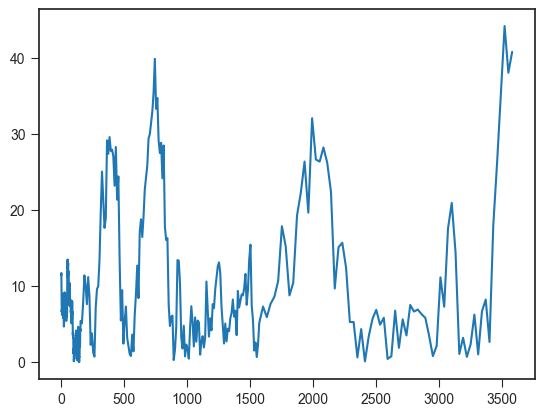

In [151]:
plt.plot(time,abs(counts-fitfunc(time,*params)))